In [30]:
# Yash Singh 
# date: 11/12/24 
# this scripts estimates the monthly flow rate of vacancy creation and vacancy fill rate 

In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [32]:
# Specify directories 
output_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/output"
 

In [33]:
data = pd.read_csv(f"{output_dir}/data/dfh_estimation.csv")
data['date'] = pd.to_datetime(data['date'])

In [34]:
days = 26 

data['vacancy_rate'] = data['vacancy_stock'] / (data['E'] + data['U'])
data['daily_job_filling_rate'] = (data['tot_hires']/data['vacancy_stock'])*(1/days)

data['daily_obsolesence'] = (data['tot_layoffs']/data['E'])*(1/days)

data['daily_flow_new_vacancies_lvl'] = data['vacancy_stock']*(data['daily_obsolesence'] + 
                                                    data['daily_job_filling_rate'] - 
                                                    (data['daily_obsolesence']*data['daily_job_filling_rate']))

data['monthly_flow_new_vacancy_rate'] = (data['daily_flow_new_vacancies_lvl']*days / (data['E']+ data['U']))*100

data['vacancy_duration'] = 1/data['daily_job_filling_rate']

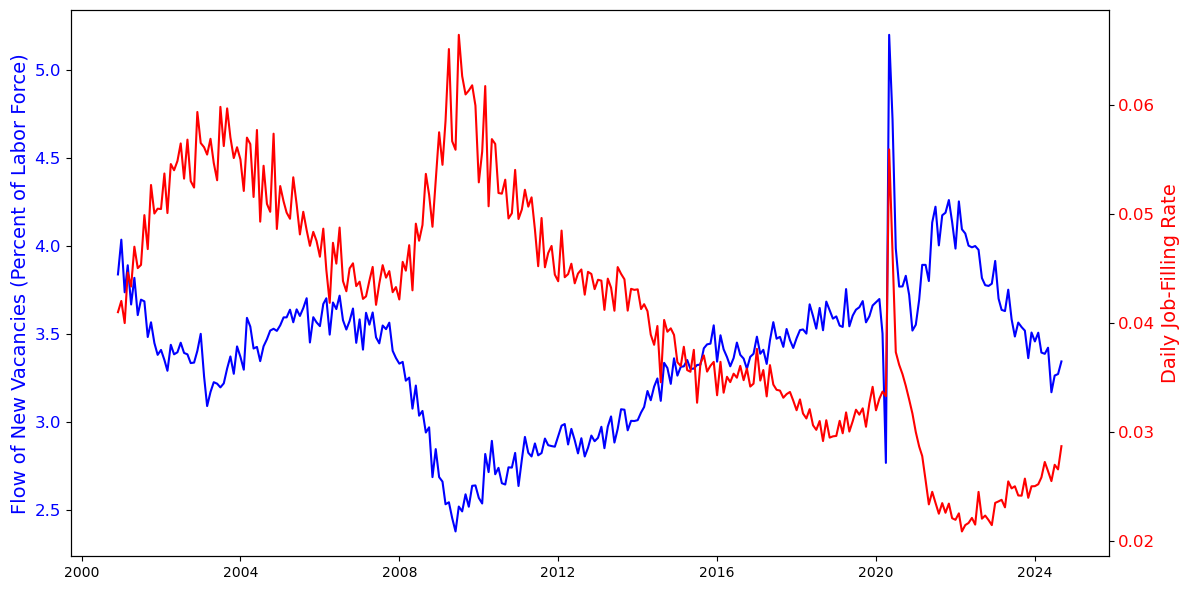

In [35]:
# Create the figure and the left axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first series on the left y-axis
ax1.plot(data['date'], data['monthly_flow_new_vacancy_rate'], label='Monthly Flow of New Vacancies (Left Axis)', color='blue')
ax1.set_ylabel('Flow of New Vacancies (Percent of Labor Force)', color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=12)

# Create the right y-axis
ax2 = ax1.twinx()
ax2.plot(data['date'], data['daily_job_filling_rate'], label='Daily Job-Filling Rate (Right Axis)', color='red')
ax2.set_ylabel('Daily Job-Filling Rate', color='red', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red', labelsize=12)

# Adjust layout
fig.tight_layout()


# Save the plot
plt.savefig(f"{output_dir}/figures/new_vacancy_flows_and_daily_job_filling_rate.pdf", bbox_inches='tight')

# Show the plot
plt.show()


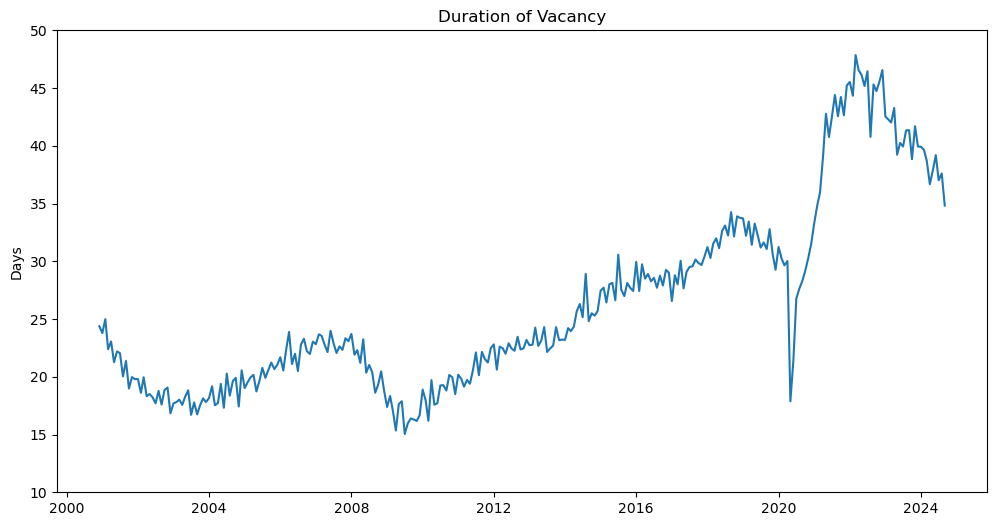

In [37]:
# Create the plot 
plt.figure(figsize=(12, 6)) 
    
# Plot both lines
plt.plot(data['date'], data['vacancy_duration'])
plt.ylim(10,50)
# Customize the plot
plt.title('Duration of Vacancy')
plt.ylabel("Days")
plt.savefig(f"{output_dir}/figures/vacancy_duration_long.pdf", bbox_inches='tight')
plt.show()


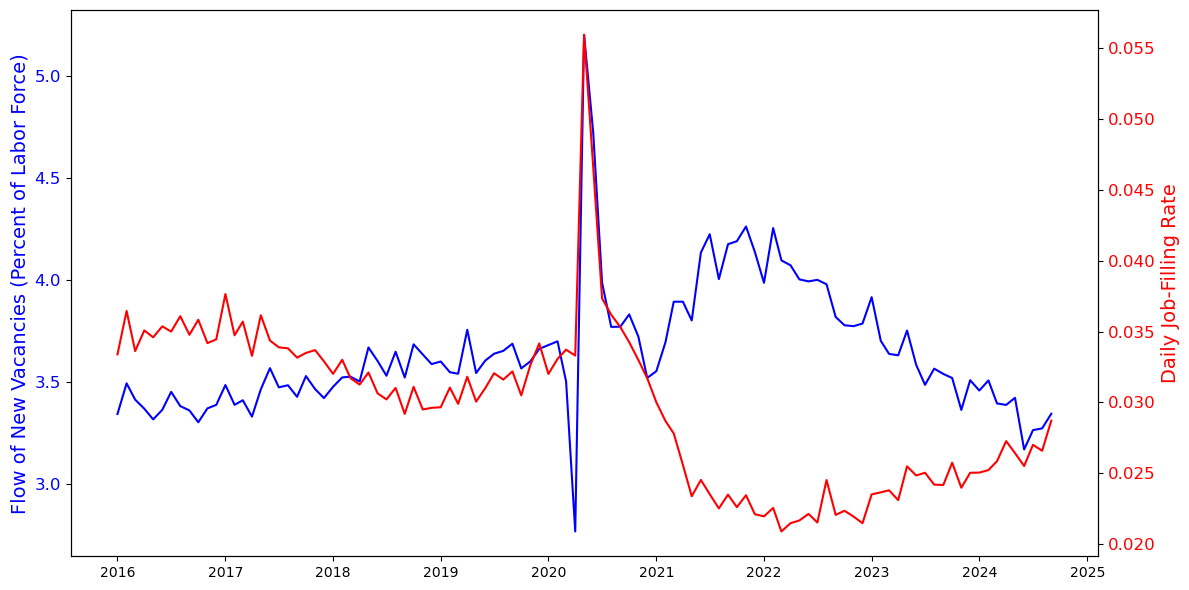

In [38]:
data = data[data['date'] >= '2016-01-01']
# Create the figure and the left axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first series on the left y-axis
ax1.plot(data['date'], data['monthly_flow_new_vacancy_rate'], label='Monthly Flow of New Vacancies (Left Axis)', color='blue')
ax1.set_ylabel('Flow of New Vacancies (Percent of Labor Force)', color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=12)

# Create the right y-axis
ax2 = ax1.twinx()
ax2.plot(data['date'], data['daily_job_filling_rate'], label='Daily Job-Filling Rate (Right Axis)', color='red')
ax2.set_ylabel('Daily Job-Filling Rate', color='red', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red', labelsize=12)

# Adjust layout
fig.tight_layout()


# Save the plot
plt.savefig(f"{output_dir}/figures/new_vacancy_flows_and_daily_job_filling_rate_short.pdf", bbox_inches='tight')

# Show the plot
plt.show()

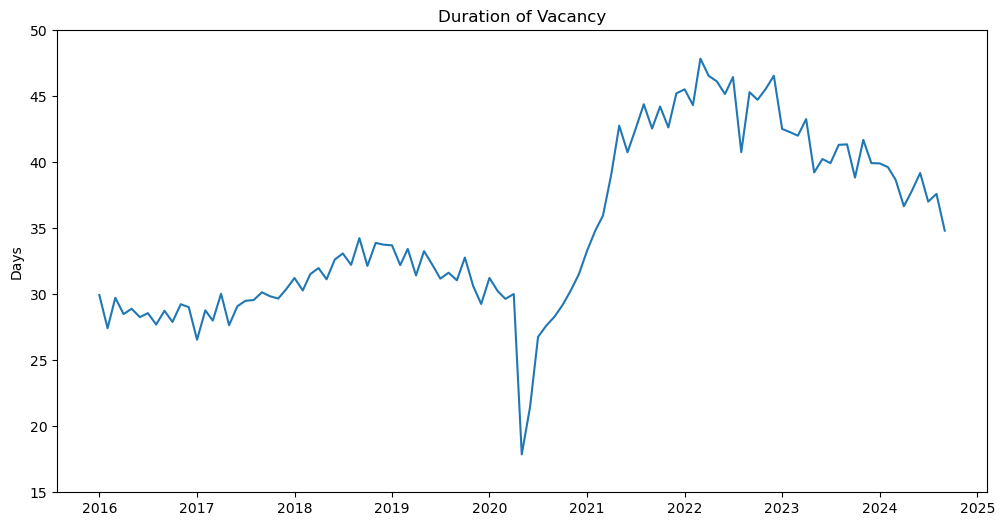

In [40]:
# Create the plot 
plt.figure(figsize=(12, 6)) 
    
# Plot both lines
plt.plot(data['date'], data['vacancy_duration'])
plt.ylim(15,50)
# Customize the plot
plt.title('Duration of Vacancy')
plt.ylabel("Days")
plt.savefig(f"{output_dir}/figures/vacancy_duration_short.pdf", bbox_inches='tight')
plt.show()
